In [ ]:
https://fbref.com/en/

In [191]:
import sqlite3
import pandas as pd
import matplotlib
import math
import requests
import csv
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13

In [52]:
# This cell is just for reading in all of the csv file, the website had a poor 
#naming convention for changing year so had to be done manually
teams21_22 = pd.read_csv("teams2021-2022.csv")
teams21_22["Season"] = "2021-2022"
players21_22 = pd.read_csv("players2021-2022.csv")
players21_22["Season"] = "2021-2022"
teams20_21 = pd.read_csv("teams2020-2021.csv")
teams20_21["Season"] = "2020-2021"
players20_21 = pd.read_csv("players2020-2021.csv")
players20_21["Season"] = "2020-2021"
teams19_20 = pd.read_csv("teams2019-2020.csv")
teams19_20["Season"] = "2019-2020"
players19_20 = pd.read_csv("players2019-2020.csv")
players19_20["Season"] = "2019-2020"

In [64]:
#Combining the dataframes
teams_df = teams21_22.append(teams20_21.append(teams19_20))
players_df = players21_22.append(players20_21.append(players19_20))

In [55]:
teams_df

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,Season
0,Arsenal,27,24.4,53.2,38,418,3420,38.0,60,41,...,1.58,1.08,2.66,1.45,2.53,59.9,54.0,36.8,90.8,2021-2022
1,Aston Villa,31,26.1,46.5,38,418,3420,38.0,50,42,...,1.32,1.11,2.42,1.24,2.34,44.0,41.8,33.6,75.4,2021-2022
2,Brentford,29,25.4,44.5,38,418,3420,38.0,46,33,...,1.21,0.87,2.08,1.05,1.92,47.8,43.3,33.0,76.2,2021-2022
3,Brighton,26,26.2,54.7,38,418,3420,38.0,40,30,...,1.05,0.79,1.84,0.95,1.74,46.0,40.7,29.1,69.8,2021-2022
4,Burnley,23,28.5,39.8,38,418,3420,38.0,32,26,...,0.84,0.68,1.53,0.82,1.50,39.0,37.4,27.7,65.1,2021-2022
5,Chelsea,26,27.4,62.3,38,418,3420,38.0,75,52,...,1.97,1.37,3.34,1.76,3.13,67.2,60.7,46.9,107.6,2021-2022
6,Crystal Palace,24,27.1,50.9,38,418,3420,38.0,50,31,...,1.32,0.82,2.13,1.16,1.97,46.4,40.3,29.8,70.0,2021-2022
7,Everton,33,26.7,39.7,38,418,3420,38.0,42,29,...,1.11,0.76,1.87,0.95,1.71,42.8,37.5,27.2,64.8,2021-2022
8,Leeds United,29,26.1,52.5,38,418,3420,38.0,42,26,...,1.11,0.68,1.79,0.97,1.66,47.2,43.4,31.1,74.5,2021-2022
9,Leicester City,28,26.5,52.1,38,418,3420,38.0,62,46,...,1.63,1.21,2.84,1.58,2.79,50.8,49.3,34.0,83.3,2021-2022


In [65]:
#Cleaning the data a bit
players_df["Player"] = players_df["Player"].apply(lambda p: p[0:p.index("\\")])
players_df["Nation"] = players_df["Nation"].apply(lambda p: p[p.index(" "):])

In [67]:
players_df

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,Season
0,1,Max Aarons,ENG,DF,Norwich City,21,2000,34,32,2881,...,0.00,0.06,0.06,0.00,0.06,0.7,0.7,1.4,2.1,2021-2022
1,2,Che Adams,SCO,FW,Southampton,25,1996,30,23,2039,...,0.31,0.13,0.44,0.31,0.44,7.1,7.1,2.6,9.7,2021-2022
2,3,Rayan Aït Nouri,FRA,DF,Wolves,20,2001,23,20,1828,...,0.05,0.10,0.15,0.05,0.15,0.7,0.7,1.3,2.1,2021-2022
3,4,Kristoffer Ajer,NOR,DF,Brentford,23,1998,24,23,1995,...,0.05,0.14,0.18,0.05,0.18,0.8,0.8,1.4,2.2,2021-2022
4,5,Nathan Aké,NED,DF,Manchester City,26,1995,14,10,923,...,0.20,0.00,0.20,0.20,0.20,1.1,1.1,0.5,1.6,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,Wilfried Zaha,CIV,MFFW,Crystal Palace,26,1992,38,37,3280,...,0.11,0.08,0.19,0.11,0.19,5.3,5.3,3.3,8.6,2019-2020
518,519,Christoph Zimmermann,GER,DF,Norwich City,26,1993,17,16,1430,...,0.00,0.06,0.06,0.00,0.06,0.3,0.3,0.1,0.4,2019-2020
519,520,Oleksandr Zinchenko,UKR,DF,Manchester City,22,1996,19,13,1276,...,0.00,0.00,0.00,0.00,0.00,0.4,0.4,1.7,2.1,2019-2020
520,521,Richairo Živković,NED,FW,Sheffield Utd,22,1996,5,0,112,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.2,0.2,2019-2020


In [77]:
#This cell converts our dataframes into a database so I can use SQL querys
conn = sqlite3.connect("premier_league.db")
teams_df.to_sql("teams", conn, if_exists = "replace", index = False)
players_df.to_sql("players", conn, if_exists = "replace", index = False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [70]:
#This function just makes it quicker to write queries
def qry(QUERY):
    return pd.read_sql(QUERY, conn)

In [141]:
#Now lets have some fun with SQL queries.
#Lets find out which top 5 players had the most cumulative goals across the 3 seasons 
#and for what club they play.
top5_scorers = qry("""
SELECT DISTINCT Player, Squad, SUM(Gls) as Total
FROM players
GROUP BY Player
ORDER BY Total DESC
LIMIT 5
""")
top5_scorers = top5_scorers.set_index("Player")
top5_scorers

,Squad,Total
Player,,
Mohamed Salah,Liverpool,64
Harry Kane,Tottenham,58
Jamie Vardy,Leicester City,53
Son Heung-min,Tottenham,51
Sadio Mané,Liverpool,45


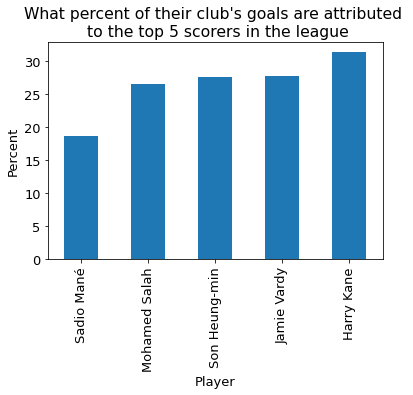

In [173]:
#Wow that's a lot of goals. Lets see what percentage they socre 
#of the total goals for their club across the 3 seasons

#First lets get the tally of how many goals each team scored across the 3 seasons
club_goals_df = qry("""
SELECT DISTINCT Squad, SUM(Gls) as Total
FROM Teams
GROUP BY Squad
""")
club_goals_df = club_goals_df.set_index("Squad")
#Next line creates our data frame with each player comapared to what percent of their club's goals they scored
goal_percent_df = pd.DataFrame.from_dict({player: top5_scorers.loc[player]["Total"] / \
                     club_goals_df.loc[top5_scorers.loc[player]["Squad"]] * 100 for player in top5_scorers.index}, orient ='index')
goal_percent_df = goal_percent_df.sort_values(by = "Total")
ax = goal_percent_df.plot.bar()
ax.set_xlabel("Player")
ax.set_ylabel("Percent")
ax.get_legend().remove()
ax.set_title("What percent of their club's goals are attributed \n to the top 5 scorers in the league")
None

In [181]:
# Lets find out who was the most unlucky player in the 2019-2020 Season
# I am going to calculate this by finding which player had the lowest non-zero goals to expeceted goals ratio
qry("""
SELECT Player, (Gls / xG) * 100 AS Ratio
FROM players
WHERE Season = "2019-2020" AND Ratio IS NOT Null AND Ratio > 0
ORDER BY Ratio
LIMIT 1
""")

,Player,Ratio
0,David McGoldrick,29.411765


# Tough luck David!

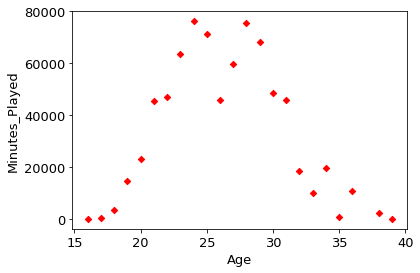

In [198]:
# Now lets find out if theres a relationship between a players age and how many minutes 
# they played in the 2021-2022 season
age_mins_df = qry("""
SELECT Age, SUM(Min) as Minutes_Played
FROM players
WHERE Season = "2021-2022"
GROUP BY Age
ORDER BY Age
""")
ax = age_mins_df.plot.scatter("Age", "Minutes_Played", color = "r", marker = "D")

## As we can see here players in the middle of the age range seem to have the most minutes played. This is likely as they strike the perfered balance between experience and athleticism

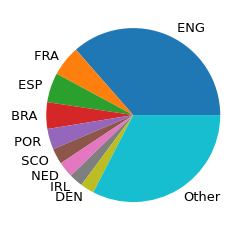

In [234]:
#Now lets see what nationalities make up the premier league 2021-2022 season
nations_count = qry("""
SELECT Nation, COUNT(Nation) as Player_Count
FROM players
WHERE Season = "2021-2022"
GROUP BY Nation
ORDER BY Player_Count DESC
""")
top_10_nations = nations_count.iloc[:9]
other = nations_count["Player_Count"].iloc[9:].sum()
top_10_nations = top_10_nations.append({"Nation": "Other", "Player_Count": other}, ignore_index = True)
top_10_nations = top_10_nations.set_index("Nation")
ax = top_10_nations.plot.pie(y = "Player_Count", legend = False, ylabel = "")